In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.layers import Embedding, LSTM, Dense

In [14]:
#load dataset
df = pd.read_csv('/content/train.csv',encoding='latin1')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [18]:
# Handle NaN values in the text column
df['text'].fillna('', inplace=True)

In [19]:
#split dataset into testing and training
X = df['text']  # Assuming 'text' column contains the text data
y = df['sentiment']  # Assuming 'sentiment' column contains the sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Vectorize your text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [70]:
'''# Train and evaluate SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train_encoded)
svm_pred = svm_model.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
print("SVM Accuracy:", svm_accuracy)'''
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
# Train OvR SVM model
svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train_vec, y_train_encoded)
# Predictions
svm_pred = svm_model.predict(X_test_vec)
# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, svm_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6952883390940513


In [ ]:
# Train and evaluate kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vec, y_train_encoded)
knn_pred = knn_model.predict(X_test_vec)
knn_accuracy = accuracy_score(y_test_encoded, knn_pred)
print("kNN Accuracy:", knn_accuracy)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [25]:
# Train and evaluate Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train_encoded)
nb_pred = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.6499909041295252


In [26]:
# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vec, y_train_encoded)
rf_pred = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test_encoded, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.6916499909041295


In [27]:
# Train and evaluate Convolutional Neural Network (CNN) model
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [28]:
cnn_model = Sequential()
cnn_model.add(Embedding(max_words, 50, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=32)
cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test_encoded)[1]
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/5
687/687 [==============================] - 15s 21ms/step - loss: -553.3212 - accuracy: 0.4041
Epoch 2/5
687/687 [==============================] - 14s 20ms/step - loss: -23393.7539 - accuracy: 0.4043
Epoch 3/5
687/687 [==============================] - 14s 20ms/step - loss: -148052.5469 - accuracy: 0.4043
Epoch 4/5
687/687 [==============================] - 14s 20ms/step - loss: -478596.8125 - accuracy: 0.4043
Epoch 5/5
172/172 [==============================] - 2s 10ms/step - loss: -1533905.1250 - accuracy: 0.4057
CNN Accuracy: 0.40567582845687866


In [44]:
# Encode the target labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [45]:
# Split data into training and testing sets
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [47]:
# Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [48]:
# Define LSTM model architecture
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/5
687/687 [==============================] - 163s 232ms/step - loss: -3.7898 - accuracy: 0.4324 - val_loss: -11.8299 - val_accuracy: 0.4794
Epoch 2/5
687/687 [==============================] - 143s 209ms/step - loss: -20.5426 - accuracy: 0.4750 - val_loss: -26.7028 - val_accuracy: 0.4624
Epoch 3/5
687/687 [==============================] - 142s 207ms/step - loss: -40.5790 - accuracy: 0.4988 - val_loss: -44.0733 - val_accuracy: 0.4928
Epoch 4/5
687/687 [==============================] - 140s 204ms/step - loss: -62.1604 - accuracy: 0.5183 - val_loss: -59.0189 - val_accuracy: 0.4746
Epoch 5/5
687/687 [==============================] - 141s 205ms/step - loss: -79.9905 - accuracy: 0.5136 - val_loss: -76.2141 - val_accuracy: 0.4932


In [50]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

172/172 [==============================] - 18s 102ms/step - loss: -76.2141 - accuracy: 0.4932
Test Accuracy: 0.4931780993938446


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

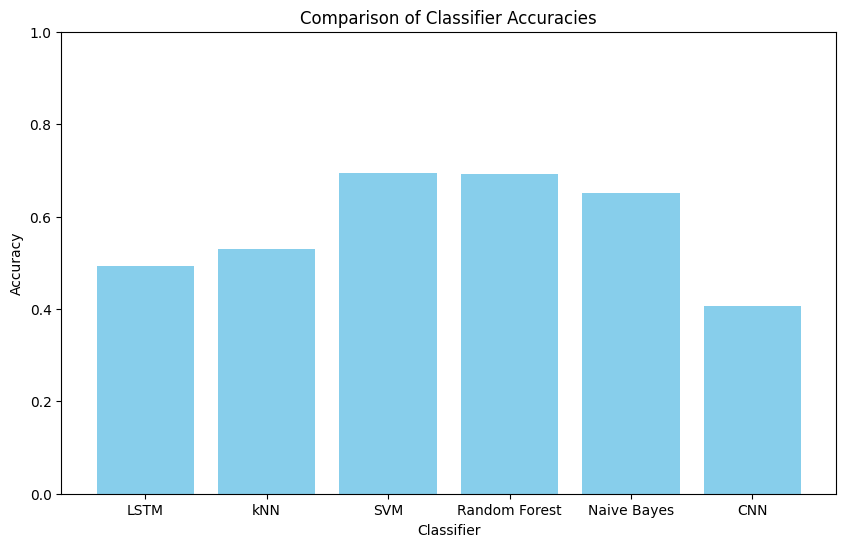

In [67]:
import matplotlib.pyplot as plt

# Define classifiers and their accuracies
classifiers = ['LSTM','kNN', 'SVM', 'Random Forest', 'Naive Bayes', 'CNN']
accuracies = [accuracy,knn_accuracy, svm_accuracy, rf_accuracy, nb_accuracy, cnn_accuracy]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy values
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, mean_absolute_error

# Assuming y_true_binary and y_pred_regression are your true and predicted values respectively

# ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_true_binary, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

# MAE
mae_svm = mean_absolute_error(y_true_regression, svm_pred)
print("Mean Absolute Error (MAE) (SVM):", mae_svm)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_svm = mean_absolute_percentage_error(y_true_regression, svm_pred)
print("Mean Absolute Percentage Error (MAPE) (SVM):", mape_svm)

# Plot true vs predicted values for regression
plt.figure()
plt.plot(y_true_regression, label='True Values')
plt.plot(y_pred_svm, label='Predicted Values (SVM)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('True vs Predicted Values (Regression) (SVM)')
plt.legend()
plt.show()


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, mean_absolute_error
# Calculate ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_pred)
roc_auc_svm = auc(fpr_svm, tpr_svm)
# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported